# NanoSolveIT KB and eNanoMapper Ontology
This notebook generates some visualizations and statistics about the usage of eNanoMapper ontology terms described to use either a nanomaterial or measurement variable in the NanoSolveIT Knowledge Base.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from faerun import Faerun
import tmap as tm
import pandas as pd
import re
import json

In [ ]:
# Import SPARQL result
data = pd.read_csv('data/NanoSolveIT-KnoweldgeBase_eNM-Ontology-term-use_27-9-22.csv')
data = data.replace(np.NaN, "")
iriPattern = re.compile(r'[A-Za-z]+[:_]\d+')
# Split provided eNM term into IRI and Label
data['iri'] = [re.search(iriPattern, enmTerm).group().replace("_",":") if re.search(iriPattern, enmTerm) is not None else "" for enmTerm in data['eNM term']]
data['label'] = [enmTerm.replace(re.search(iriPattern, enmTerm).group(), "") for enmTerm in data['eNM term']]
# Unpivot based on OECD test guideline
oecd = data['described variable.OECD Testguideline'].apply(lambda x : pd.Series(str(x).split(";"))).stack()
data = pd.merge(oecd.reset_index(), data.reset_index(), left_on = 'level_0', right_on = 'index').rename(columns={0:"oecd_guideline"}).drop(["level_0", "level_1", "index", "described variable.OECD Testguideline"], axis=1)
# Unpivot based on described nanomaterial
nanomaterial = data['described Nanomaterial'].apply(lambda x : pd.Series(str(x).split(";"))).stack()
data = pd.merge(nanomaterial.reset_index(), data.reset_index(), left_on = 'level_0', right_on = 'index').rename(columns={0:"nanomaterial"}).drop(["level_0", "level_1", "index", "described Nanomaterial"], axis=1)
# Unpivot based on described variable
variable = data['described variable.Variable'].apply(lambda x : pd.Series(str(x).split(";"))).stack()
data = pd.merge(variable.reset_index(), data.reset_index(), left_on = 'level_0', right_on = 'index').rename(columns={0:"variable"}).drop(["level_0", "level_1", "index", "described variable.Variable"], axis=1)
# Unpivot based on dataset
dataset = data['described variable.Dataset'].apply(lambda x : pd.Series(str(x).split(";"))).stack()
data = pd.merge(dataset.reset_index(), data.reset_index(), left_on = 'level_0', right_on = 'index').rename(columns={0:"dataset"}).drop(["level_0", "level_1", "index", "described variable.Dataset", "eNM term"], axis=1)
# Rearrange columns
data = data[["label","iri", "variable", "dataset", "nanomaterial", "oecd_guideline"]]

In [ ]:
label = list(data["label"])
iris = list(data["iri"])
variable = list(data["variable"])
dataset = list(data["dataset"])
nanomaterial = list(data["nanomaterial"])
oecd_guideline = list(data["oecd_guideline"])
data.to_csv("nanosolveit.csv", index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

def nested_circles(data, labels=None, c=None, ax=None, 
                   cmap=None, norm=None, textkw={}):
    """
    https://stackoverflow.com/questions/59266060/how-to-do-a-nested-proportional-area-chart-circles
    """
    ax = ax or plt.gca()
    data = np.array(data)
    R = np.sqrt(data/(data.max()))
    p = [plt.Circle((0,r), radius=r) for r in R[::-1]]
    arr = data[::-1] if c is None else np.array(c[::-1])
    col = PatchCollection(p, cmap=cmap, norm=norm, array=arr)

    ax.add_collection(col)
    ax.axis("off")
    ax.set_aspect("equal")
    ax.autoscale()

    if labels is not None:
        kw = dict(color="white", va="center", ha="center")
        kw.update(textkw)
        ax.text(0, R[0], labels[0], **kw)
        for i in range(1, len(R)):
            ax.text(0, R[i]+R[i-1], labels[i], **kw)
    return col

[['', 9], ['AB_100_AVG', 2048], ['AB_100_MED', 2048], ['AB_AVG', 2048], ['AB_MED', 2048], ['AB_effect', 2048], ['AB_induction', 2048], ['AB_inhibition', 2048], ['Absolute_protein_binding_BCA.SD', 5950], ['Area', 2], ['BET', 48], ['BET.SD', 5998], ['Binding capacity_wt%.SD', 5950], ['Boundary Size [nm]', 120], ['Boxivity', 16], ['CV_100_AVG', 2048], ['CV_100_MED', 2048], ['CV_AVG', 2048], ['CV_MED', 2048], ['CV_effect', 2048], ['CV_induction', 2048], ['CV_inhibition', 2048], ['Circularity', 33], ['Circularity #2', 33], ['Convexity', 81], ['Convexity #2', 81], ['DLS', 320], ['DLS.SD', 6270], ['Diameter', 25], ['Eccentricity', 16], ['Electrophoretic.mobility.SD', 5950], ['Extend', 16], ['LDH_100_AVG', 2048], ['LDH_100_MED', 2048], ['LDH_AVG', 2048], ['LDH_MED', 2048], ['LDH_effect', 2048], ['LDH_induction', 2048], ['LDH_inhibition', 2048], ['Main Elongation', 81], ['Major Axis [nm]', 81], ['Maximum Ferets Diameter', 32], ['Minimum Ferets Diameter', 32], ['Minor Axis [nm]', 81], ['NTA.SD',

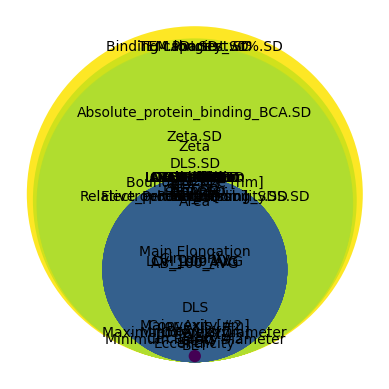

In [58]:
count_var = [[var, variable.count(var)] for var in np.unique(variable)]
var_lab = [counts[0] for counts in count_var]
count_var = [counts[1] for counts in count_var]
print(count_var)
nested_circles(count, var_lab, textkw=dict(color="black", fontsize=10))
plt.show()

In [101]:
def scatterplot(x_data, y_data, s_data, x_label="", y_label="", title="", color = "r", yscale_log=False, xscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = s_data, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')
        ax.set_xscale('log')


    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.xticks(np.arra)
    
    

In [67]:
varcount = [for iri in np.unique(iris)]



23

In [68]:
print(len(count_iri), len(count_var), len(count_dataset), len(count_nanomaterial), len(count_oecd))
#scatterplot(x_data=count_var, y_data = count_oecd, s_data=count_iri)

23 59 1088 10 4


In [97]:
data["nanomaterial"][data["iri"]=="NPO:606"]

count_nano =[np.log(len(data["nanomaterial"][data["iri"]== i])) for i in np.unique(iris)]
count_ds =[np.log(len(data["dataset"][data["iri"]== i])) for i in np.unique(iris)]
count_var =[np.sqrt(len(data["variable"][data["iri"]== i])) for i in np.unique(iris)]
count_oecd =[len(data["oecd_guideline"][data["iri"]== i]) for i in np.unique(iris)]


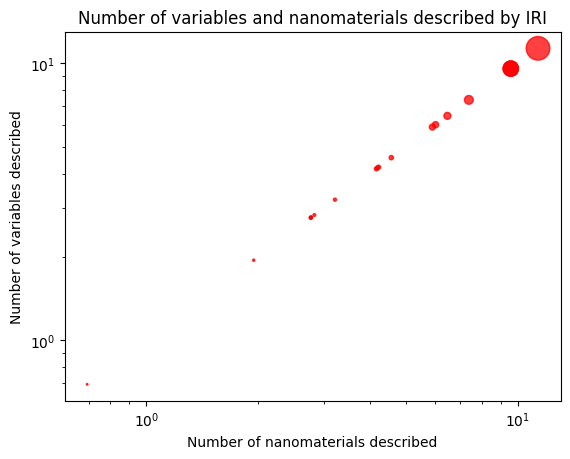

In [103]:
scatterplot(x_data=count_nano, 
            y_data=count_ds, 
            s_data=count_var, 
            x_label= "Number of nanomaterials described", 
            y_label="Number of variables described",
            yscale_log=True, xscale_log=True,
            title="Number of variables and nanomaterials described by IRI")

129695    
129696    
129697    
129698    
129699    
129700    
129701    
129702    
129703    
129704    
129705    
129706    
129707    
129708    
129709    
129710    
129711    
Name: nanomaterial, dtype: object